In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import sys
print(sys.version)

In [4]:
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt  #for plotting the results

In [5]:
# loading the training dataset
fashion_mnist_train=('../input/fashionmnist/fashion-mnist_train.csv')
df=pd.read_csv(fashion_mnist_train)
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
y_train=df.loc[:,'label']
print(y_train)
print("type= ",type(y_train))
print(y_train.shape)
print(y_train.size)

x_train=df.iloc[:,1:]
print(x_train)
print(x_train.shape)

0        2
1        9
2        6
3        0
4        3
        ..
59995    9
59996    1
59997    8
59998    8
59999    7
Name: label, Length: 60000, dtype: int64
type=  <class 'pandas.core.series.Series'>
(60000,)
60000
       pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       5       0   
3           0       0       0       1       2       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
59995       0       0       0       0       0       0       0       0       0   
59996       0       0       0       0       0       0       0       0       0   
59997       0       0       0       0       0      

In [7]:
m,n=df.shape
print(m,n)  #m is the no of labeled examples and n is the 784 pixels with 0th column label column

60000 785


In [8]:
fashion_mnist_test=('../input/fashionmnist/fashion-mnist_test.csv')
df1=pd.read_csv(fashion_mnist_test)
df1.head()


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


As is evident from the dataset that rows contain the differnt labeled exaples and the columns contain the info of each pixel of the particular image of the row

In [9]:
#activation function (sigmoid)
#to introduce the non linearity in the output so as to train the model well for the complex relations
def sigmoid_activation(t):
    return 1.0/(1.0+np.exp(-t))

In [10]:
#will need the derivative while backpropagating
def sigmoid_der(t):
    return sigmoid_activation(t)*(1-sigmoid_activation(t))

In [11]:
def softmax_fun(t):
    t=np.float128(t) #for solving the probem of large exp(t)
    return np.exp(t)/np.sum(np.exp(t))

In [12]:
def initialize_param():
    #np.random.rand(a,b) makes an matrix of the size(a,b)
    # There are 1000 nodes in the hidden layer
    w1=np.random.rand(1000,784)-0.5     
    b1=np.random.rand(1000,1)-0.5
    w2=np.random.rand(10,1000)-0.5
    b2=np.random.rand(10,1)-0.5
    
    return w1,b1,w2,b2

In [13]:
def frwd_pass(w1,b1,X,w2,b2):
    output=w1.dot(X.T)+b1  
#     print("Forward pass")
#     print("w1 shape= ", w1.shape)
#     print("w2 shape= ", w2.shape)
#     print("b1 shape= ", b1.shape)
#     print("b2 shape= ", b2.shape)
# each weight is multiplied to the pixels info and then added (inner product of matrices)
# task: to understand the dimension of the output matrix 
    output_act=sigmoid_activation(output)
    soft_out=w2.dot(output_act)+b2  
    soft_act=softmax_fun(soft_out)
#     print(soft_out)
#     print("Forward pass")
    return output,output_act,soft_out,soft_act

In [14]:
w1,b1,w2,b2=initialize_param()
output,output_act,soft_out,soft_act=frwd_pass(w1,b1,x_train,w2,b2)
output.shape

Forward pass
w1 shape=  (1000, 784)
w2 shape=  (10, 1000)
b1 shape=  (1000, 1)
b2 shape=  (10, 1)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


Forward pass


(1000, 60000)

In [15]:
#one_hot_encoding function
def one_hot_encode(y):
    one_hot_y=np.zeros((y.size,y.max()+1))
    for i,ys in enumerate(y):
        one_hot_y[i][ys]=1
    return one_hot_y

In [16]:
l=one_hot_encode(y_train)
# print(one_hot_y.size)
print(l)
print(l.shape)

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 0.]]
(60000, 10)


In [17]:
def backprop(output,output_act,soft_out,soft_act,w1,w2,x,y):
    """function documentation
        output.shape=hidden layers nueronsxN
        output_act=hidden layers nueronsxN
        soft_out=10xN
        soft_act=10xN
        one_hot_y=Nx10
        """
    one_hot_y=one_hot_encode(y)
#     print("one_hot_y= ")
#     print(one_hot_y)
    d_soft_out=soft_act-one_hot_y.T  #shape=(10,60000)
#     print("d_soft_out shape= ",d_soft_out.shape)
#     print("d_soft_out= ")
#     print(d_soft_out)
    dw2=1/m*d_soft_out.dot(output_act.T)
    db2=1/m*np.sum(d_soft_out)
    d_output=w2.T.dot(d_soft_out)*sigmoid_der(output) #shape=(1000,60000)
#     print("d_o/p shape= ",d_output.shape)
#     print("d_output= ")
#     print(d_output)
#     print("Backward prop")
    dw1=1/m*d_output.dot(x) #why divided by m?
#     print("dw1=")
#     print(dw1)
    db1=1/m*np.sum(d_output)
#     print("db1")
#     print(db1)
    
    

    return dw1,db1,dw2,db2

In [18]:
def update_params(dw1,db1,dw2,db2,w2,b2,w1,b1,alpha):
    
    w1_new=w1-alpha*dw1
    b1_new=b1-alpha*db1
    w2_new=w2-alpha*dw2
    b2_new=b2-alpha*db2
    
    return w1_new,b1_new,w2_new,b2_new

In [19]:
def get_predictions(soft_act):
    l=np.argmax(soft_act,0)#returns the maximum probablity label
    one_hot_pred=one_hot_encode(l)
    return one_hot_pred,l

In [67]:
def accuracy(predictions,y):
    
#     print("predictions= ",predictions,"y= ",y)
#     print(predictions==y)
    return np.sum(predictions==y)/y.size #returns the average of the values where the predictions were correct

In [68]:
def cost_function(predictions,y):
#     print(predictions,y)
    L= (predictions-y)**2  #mean squared error #Loss
    J=np.sum(L,axis=0)/(y.size)    #cost
    return J

In [69]:
# def main_function(x,y,alpha,iterations):
    
#     w1_new,b1_new,w2_new,b2_new=initialize_param()
# #     print("initial w1= ",w1_new)
# #     print("initial w2= ",w2_new)
# #     print("initial b1= ",b1_new)
# #     print("initial b2= ",b2_new)
# #     w1_new=np.array(np.array_split(w1_new,100,0))
# #     print("w1_new shape= ",w1_new.shape)
# #     b1_new=np.array(np.array_split(b1_new,100,0))
# #     print("b1_new shape= ",b1_new.shape)
# #     w2_new=np.array(np.array_split(w2_new,100,0))
# #     print("w2_new shape= ",w2_new.shape)
# #     b2_new=np.array(np.array_split(b2_new,100,0))
# #     print("b2_new shape= ",b2_new.shape)
# #     w1=w1_new
# #     w2=w2_new
# #     b1=b1_new
# #     b2=b2_new
#     for i in range(iterations):
# #             w1_new=w1[i]
# #             b1_new=b1[i]
# #             w2_new=w2[i]
# #             b2_new=b2[i]
#         output,output_act,soft_out,soft_act=frwd_pass(w1_new,b1_new,x,w2_new,b2_new)
#         dw1,db1,dw2,db2=backprop(output,output_act,soft_out,soft_act,w1,w2,x,y)
#         w1_new,b1_new,w2_new,b2_new=update_params(dw1,db1,dw2,db2,w2,b2,w1,b1,alpha)
# #         print("W1_new= ",w1_new)
# #         print("W2_new= ",w2_new)
# #         print("b1_new= ",b1_new)
# #         print("b2_new= ",b2_new)

# #         if i%5==0:
#         print('Iterations',i)
#         predictions=get_predictions(soft_act)
#         print("accuracy= ")
#         print(accuracy(predictions,y))
#         print("Cost function output= ")
#         print(cost_function(predictions,y))
# #         print("W1_new= ",w1_new)
# #         print("W2_new= ",w2_new)
# #         print("b1_new= ",b1_new)
# #         print("b2_new= ",b2_new)

    
#     return w1,b1,w2,b2

In [70]:
y_train_hot=one_hot_encode(y_train)
print(y_train_hot)
print(y_train_hot.shape)

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 0.]]
(60000, 10)


In [71]:
costs=[] #an empty list for storing the cost of each iterations
acc=[] #an empty list for storing the acc 
it=[]
def main_function(x,y,alpha,iterations):
    
#     y_train_hot=one_hot_encode(y)
    w1_new,b1_new,w2_new,b2_new=initialize_param()
    for i in range(iterations):
        if i%1==0:
            output,output_act,soft_out,soft_act = frwd_pass(w1_new,b1_new,x,w2_new,b2_new)
            predictions,l=get_predictions(soft_act)
            J=cost_function(l,y)
            costs.append(J)
            A=accuracy(l,y)
            acc.append(A)
            it.append(i)
            print("Iterations: ",i," Cost= %.3f" %J," Accuracy= %.3f" %A)
#             print("Cost= %.3f" %J)
        dw1,db1,dw2,db2=backprop(output,output_act,soft_out,soft_act,w1_new,w2_new,x,y)
        w1_new,b1_new,w2_new,b2_new =update_params(dw1,db1,dw2,db2,w2_new,b2_new,w1_new,b1_new,alpha)
             
    
    return w1_new,b1_new,w2_new,b2_new

In [72]:
# x_t=np.array(np.array_split(x_train,100,0))
# y_t=(np.array(np.array_split(y_train,100,0))).T
# print(y_train.shape)
# print(y_train)
# print(y_t.shape)
# print(y_t[0:2])
# print(y_t[0][1])

In [73]:
# def main_function(x,y,alpha,iterations):
#     w1,b1,w2,b2=initialize_param()
#     i=0
#     if(i==iterations):
#         break
#     else:
#         output,output_act,soft_out,soft_act=frwd_pass(w1,b1,x,w2,b2)
#         dw1,db1,dw2,db2=backprop(output,output_act,soft_out,soft_act,w1,w2,x,y)
#         w1_new,b1_new,w2_new,b2_new=update_params(dw1,db1,dw2,db2,w2,b2,w1,b1,alpha)
        
        

In [74]:
ite=2
w1,b1,w2,b2=main_function(x_train,y_train,0.1,ite)

Forward pass
w1 shape=  (1000, 784)
w2 shape=  (10, 1000)
b1 shape=  (1000, 1)
b2 shape=  (10, 1)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


Forward pass
Iterations:  0  Cost= 19.634  Accuracy= 0.089
one_hot_y= 
[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 0.]]
d_soft_out shape=  (10, 60000)
d_o/p shape=  (1000, 60000)
Backward prop
Forward pass
w1 shape=  (1000, 784)
w2 shape=  (10, 1000)
b1 shape=  (1000, 1)
b2 shape=  (10, 1)
Forward pass
Iterations:  1  Cost= 16.882  Accuracy= 0.134
one_hot_y= 
[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 0.]]
d_soft_out shape=  (10, 60000)
d_o/p shape=  (1000, 60000)
Backward prop


In [75]:
p,q=df1.shape
print(p,q)

y_test=df1.loc[:,'label']
print(y_test)
print("type= ",type(y_test))
print(y_test.shape)
print(y_test.size)

x_test=df1.iloc[:,1:]
print(x_test)
print(x_test.shape)

y_test_hot=one_hot_encode(y_test)

10000 785
0       0
1       1
2       2
3       2
4       3
       ..
9995    0
9996    6
9997    8
9998    8
9999    1
Name: label, Length: 10000, dtype: int64
type=  <class 'pandas.core.series.Series'>
(10000,)
10000
      pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0          0       0       0       0       0       0       0       9       8   
1          0       0       0       0       0       0       0       0       0   
2          0       0       0       0       0       0      14      53      99   
3          0       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
9995       0       0       0       0       0       0       0       0       0   
9996       0       0       0       0       0       0       0       0       0   
9997       0       0       0       0       0       0       0 

LABEL WITH RESPECTIVE ITEMS

* 0 T-shirt/top
* 1 Trouser
* 2 Pullover
* 3 Dress
* 4 Coat
* 5 Sandal
* 6 Shirt
* 7 Sneaker
* 8 Bag
* 9 Ankle boot

In [76]:
#changing the test dataset to numpy array for easier extracting of a row for test image prediction
type(x_test)
x_test_num=x_test.to_numpy()
print(type(x_test_num))

<class 'numpy.ndarray'>


In [77]:
test_image_labels=['T-shirt/top',' Trouser','Pullover',' Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [78]:
def make_predictions(x,w1,b1,w2,b2):
    output,output_act,soft_out,soft_act=frwd_pass(w1,b1,x,w2,b2)
    predictions,l=get_predictions(soft_act)
    return predictions,l

def test_predictions(index,w1,b1,w2,b2):
    '''
    index: index of test image from test dataset (0,9999)
            It actually is one complete row of the test data with 784 col, 
            since a row contains 784 col
            
    w1,b1,w2,b2: are the final weight and ias matrices obtained after training
            '''
    
    current_image=x_test_num[index,:]    #particular row is extracted
#     current_image=current_image.to_numpy()
    
    prediction,l=make_predictions(x_test_num[index,:],w1,b1,w2,b2)
    label=y_test[index]
    #y_test[index] just returns the true label of the test image being considered, labels are
    #encoded in between 0-9 to get the name of the label test-image_label takes y_test[index]
    #as label to give out the correct output
    labels=test_image_labels[label]
    print("predictions: ",test_image_labels[l[index]]) 
    #l[index] is the predicted label of the test image which is in 0-9 since the labels are
    #encoded in that form, in order to get the name the list test_image_labels made above will
    #take l[index] as its index to o/p the name of the accessory
    
    print("Label: ",labels)
    
    
#     print(current_image.shape)
    current_image=current_image.reshape((28,28))*255
#     current_image=pd.pivot_table(current_image,index=[:])
    plt.gray()
    plt.imshow(current_image,interpolation='nearest')
    plt.show()
    
    
    

Forward pass
w1 shape=  (1000, 784)
w2 shape=  (10, 1000)
b1 shape=  (1000, 1)
b2 shape=  (10, 1)
Forward pass
predictions:  T-shirt/top
Label:  Coat
(784,)


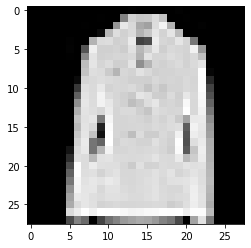

In [79]:
test_predictions(12,w1,b1,w2,b2)

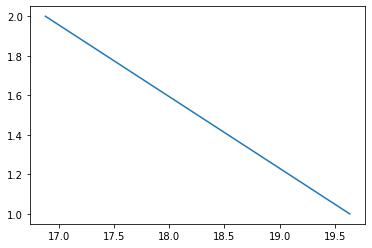

In [83]:
it=[1,2]
plt.plot(costs,it)
# plt.plot(accuracy,it)

In [ ]:
# w=np.array([[1,2,3,8],[2,4,3,2],[1,0,0,7]])
# b=np.array([[3,4,4],[2,5,1],[4,1,8],[7,8,6]])
# '''1 2 3 8     3 4 4
#    2 4 3 2     2 5 1
#    1 0 0 7     4 1 8
#                7 8 6'''
# x=w.dot(b)
# y=b.dot(w)
# print(x)
# print(y)
# print("w[0] is equal to: ",w[0])
# print("w[0,0] is equal to: ",w[0,0])
# k=w[0].dot(b)
# print(k)
# a=w[0].T.dot(b)
# print(a)
# print(a.T==k)
# s=np.array([[2,1],[3,2],[4,6]])
# # summation=w+s
# # print(summation)

# addition=np.sum(np.exp(s))
# print(addition)

# array=np.array([[1,2,3,8],[2,4,3,2],[1,0,0,7],[1,5,7,3],[1,30,28,17],[10,60,25,21]])
# new_arr=np.array(np.array_split(array,2,0))
# print("new_array= ")
# print(new_arr)
# print(new_arr[0].T)

# xf=(np.array([[2],[5],[4],[0],[1],[7]]).T)
# new_xf=np.array(np.vsplit(xf,2))
# print(new_xf)
# print(type(new_xf))

In [ ]:
# z=np.zeros((2,5))
# print(z)

In [84]:
# a=pd.Series([2,3,4])
# b=pd.Series([1,1.5,2])
# f=pd.Series([2,3,4])

# # print((a-b)**2/(a.size()))
# print(a-b)
# print(a.size)
# print((a-b)**2)
# print(((a-b)**2)/a.size)

# L=((a-b)**2)
# s=np.sum(L,axis=0)
# c=s/a.size
# # c=list(c)
# print(c)
# k=np.sum(a==f)/a.size
# print("Acc check= ",k)
